# Fake News Detection Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read Dataset

In [3]:
fake = pd.read_csv("C:\\Users\\LAKSHMI\\Desktop\\fake_news\\Fake.csv")
true = pd.read_csv("C:\\Users\\LAKSHMI\\Desktop\\fake_news\\True.csv")

In [4]:
fake.shape

(23481, 4)

In [5]:
true.shape

(21417, 4)

## Data Cleaning and Preparation

In [6]:
fake['target'] = 'fake'
true['target'] = 'true'
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
data.head()

,title,text,subject,date,target
0,"While You Were Distracted, Republicans Gutted...","On Monday, Missouri Gov. Eric Greitens signed ...",News,"February 6, 2017",fake
1,Putin Declares Syria A “No Fly Zone”…While Oba...,Does anyone remember Vladimir Putin pushing Ge...,Government News,"Oct 2, 2015",fake
2,Elizabeth Warren Supporter Purchases ‘Pocahon...,As Elizabeth Warren amps up her attacks on the...,News,"June 11, 2016",fake
3,Perfectionist Mayer leads at halfway in decathlon,LONDON (Reuters) - Frenchman Kevin Mayer led a...,politicsNews,"August 11, 2017",true
4,MUSLIM GITMO PRISONERS DICTATE RULES: Women Gu...,Whiskey Tango Foxtrot?Female soldiers serving ...,Government News,"Oct 27, 2015",fake


In [9]:
data.drop(["date"],axis=1,inplace=True) #we won't use date for analysis,so remove it
data.head()

,title,text,subject,target
0,"While You Were Distracted, Republicans Gutted...","On Monday, Missouri Gov. Eric Greitens signed ...",News,fake
1,Putin Declares Syria A “No Fly Zone”…While Oba...,Does anyone remember Vladimir Putin pushing Ge...,Government News,fake
2,Elizabeth Warren Supporter Purchases ‘Pocahon...,As Elizabeth Warren amps up her attacks on the...,News,fake
3,Perfectionist Mayer leads at halfway in decathlon,LONDON (Reuters) - Frenchman Kevin Mayer led a...,politicsNews,true
4,MUSLIM GITMO PRISONERS DICTATE RULES: Women Gu...,Whiskey Tango Foxtrot?Female soldiers serving ...,Government News,fake


In [10]:
data.drop(["title"],axis=1,inplace=True) #we won't use title, we use only text.so, remove it
data.head()

,text,subject,target
0,"On Monday, Missouri Gov. Eric Greitens signed ...",News,fake
1,Does anyone remember Vladimir Putin pushing Ge...,Government News,fake
2,As Elizabeth Warren amps up her attacks on the...,News,fake
3,LONDON (Reuters) - Frenchman Kevin Mayer led a...,politicsNews,true
4,Whiskey Tango Foxtrot?Female soldiers serving ...,Government News,fake


In [11]:
data['text'] = data['text'].apply(lambda x: x.lower()) #convert to lowercase
data.head()

,text,subject,target
0,"on monday, missouri gov. eric greitens signed ...",News,fake
1,does anyone remember vladimir putin pushing ge...,Government News,fake
2,as elizabeth warren amps up her attacks on the...,News,fake
3,london (reuters) - frenchman kevin mayer led a...,politicsNews,true
4,whiskey tango foxtrot?female soldiers serving ...,Government News,fake


In [12]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [13]:
data.head()

,text,subject,target
0,on monday missouri gov eric greitens signed le...,News,fake
1,does anyone remember vladimir putin pushing ge...,Government News,fake
2,as elizabeth warren amps up her attacks on the...,News,fake
3,london reuters frenchman kevin mayer led at t...,politicsNews,true
4,whiskey tango foxtrotfemale soldiers serving a...,Government News,fake


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAKSHMI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data.head()

,text,subject,target
0,monday missouri gov eric greitens signed legis...,News,fake
1,anyone remember vladimir putin pushing george ...,Government News,fake
2,elizabeth warren amps attacks donald trump fra...,News,fake
3,london reuters frenchman kevin mayer led halfw...,politicsNews,true
4,whiskey tango foxtrotfemale soldiers serving g...,Government News,fake


## Basic Data Exploration

>>> The articles per subject <<<
subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


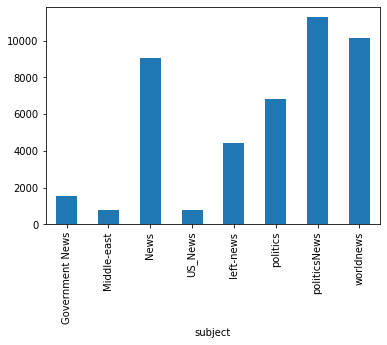

In [16]:
print(">>> The articles per subject <<<")  #how many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

>>> The Number of fake and real articles are <<<
target
fake    23481
true    21417
Name: text, dtype: int64


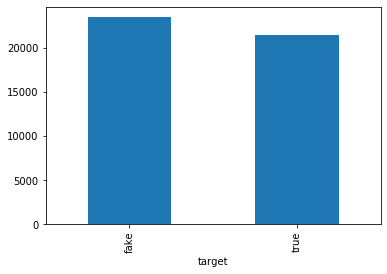

In [17]:
print(">>> The Number of fake and real articles are <<<") #How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [18]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


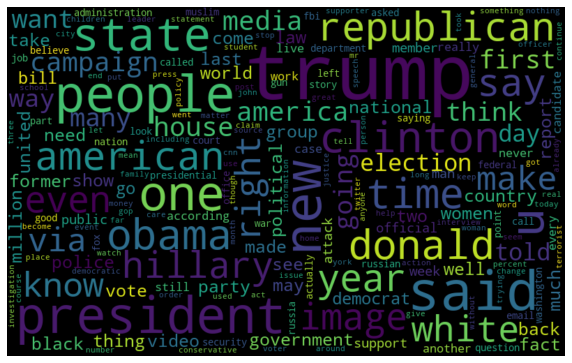

In [19]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

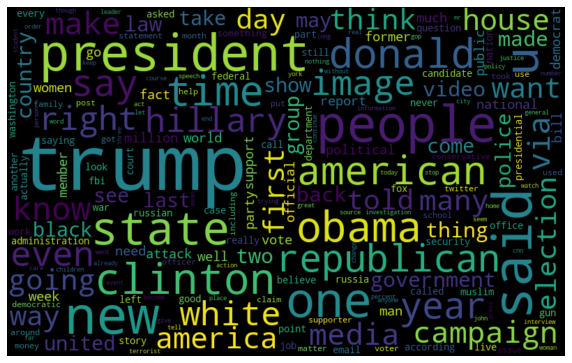

In [20]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
from nltk import tokenize # Most frequent words counter

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

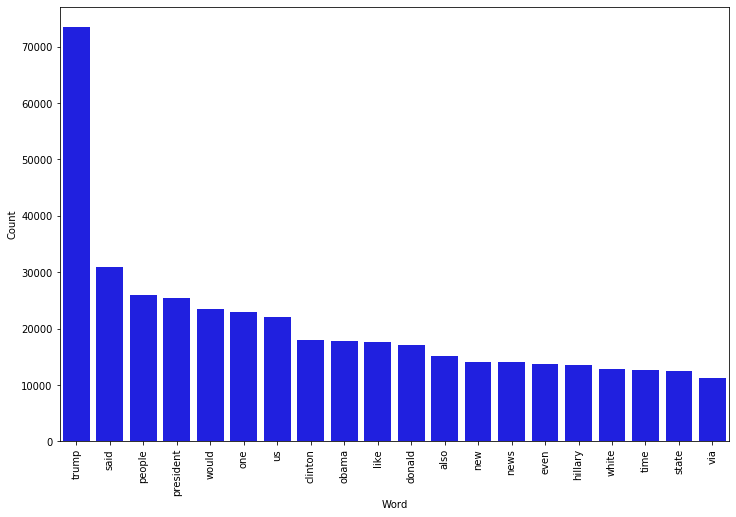

In [22]:
counter(data[data["target"] == "fake"], "text", 20)   # Most frequent words in fake news

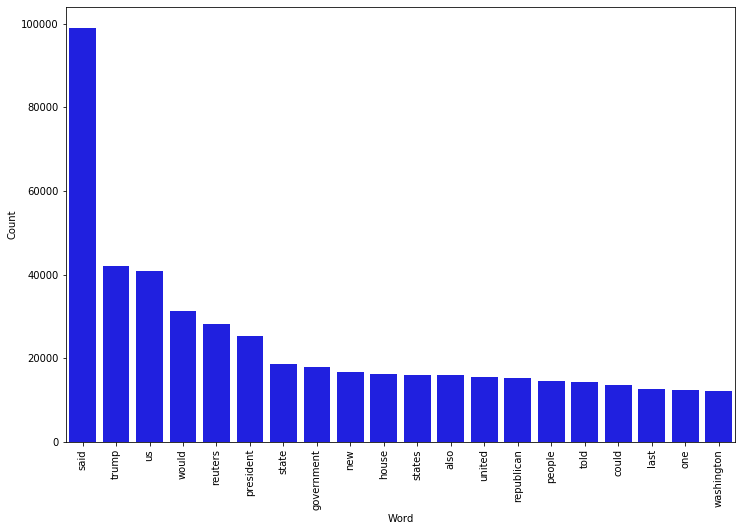

In [23]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modelling

In [24]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Preparing the Data

In [25]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

C:\Users\LAKSHMI\Anaconda3\jntuk\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy: 98.92%


Confusion matrix, without normalization


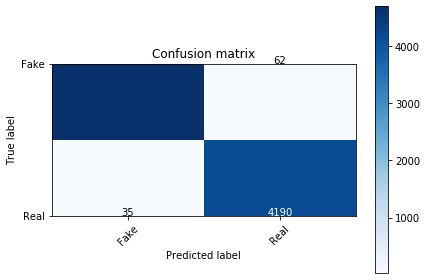

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Decision Tree classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.54%


Confusion matrix, without normalization


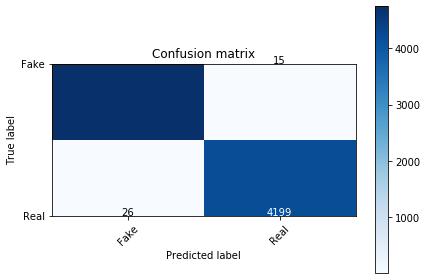

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.01%


Confusion matrix, without normalization


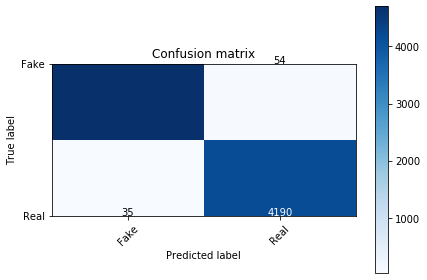

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Testing the model

**With Fake Data**

In [33]:
x = input("ENTER THE NEWS ARTICLE HERE : ")
x=[x,]

ENTER THE NEWS ARTICLE HERE : "NYC coroner who declared the death of Jeffrey Epstein a suicide made half a million dollars a year working for the Clinton Foundation until 2015"


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(x)
codes_list = ['FAKE','REAL']
nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(tfidf_train,y_train)
tfidf_test = tfidf_vectorizer.transform(x)
pred = nb_classifier.predict(tfidf_test)
pred

array(['fake'], dtype='<U4')

In [35]:
start = "\033[1m"
end = "\033[0;0m"
print('THE GIVEN NEWS ARTICLE IS ' + start + str(pred) + end)

THE GIVEN NEWS ARTICLE IS ['fake']


**With Real Data**

In [36]:
x = input("ENTER THE NEWS ARTICLE HERE : ")
x=[x,]

ENTER THE NEWS ARTICLE HERE : 	 BJP ally Hanuman Beniwal to lead farmers’ march, quits 3 Parliament panels On BJP’s hard stance amid protests, Hanuman Beniwal said there is no farmer leader in the BJP and that’s why they are not able to understand farmers’ pain


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(x)
codes_list = ['FAKE','REAL']
nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(tfidf_train,y_train)
tfidf_test = tfidf_vectorizer.transform(x)
pred = nb_classifier.predict(tfidf_test)
pred

array(['true'], dtype='<U4')

In [38]:
start = "\033[1m"
end = "\033[0;0m"
print('THE GIVEN NEWS ARTICLE IS ' + start + str(pred) + end)

THE GIVEN NEWS ARTICLE IS ['true']
